In [1]:
from astropy.coordinates import EarthLocation, AltAz, SkyCoord, GCRS
from astropy import units as u
from astropy.time import Time
import numpy as np
from datetime import datetime, timedelta

start_time = datetime(2025, 2, 21, 12, 0, 0)
current_time = start_time

vla = EarthLocation.of_site('vla')
source = SkyCoord(ra=10*u.hourangle, dec=-30*u.deg, frame='icrs')

antenna_1_pos = np.array([0,0,0])
antenna_2_pos = np.array([10,200,10])

# ENU coordinates
baseline = antenna_2_pos - antenna_1_pos

# convert to x,y,z coordinates where z points to the NCP
# we need the latitude of the site
# y will point locally eastward
# z aligns with NCP
# think of projection of NU axes onto z.
# x is y X z
latitude = vla.lat
transform_enu_xyz = np.array([
    [0, -np.sin(latitude), np.cos(latitude)], 
    [1, 0, 0], 
    [0, np.cos(latitude), np.sin(latitude)]
])
baseline_xyz = np.matmul(transform_enu_xyz, baseline)

obs_frequency = 1_000_000
obs_wavelength = 3.0 * 10**8 / obs_frequency 

9h13m35.96572673s
9h14m36.13000136s
9h15m36.294276s
9h16m36.45855063s
9h17m36.62282527s
9h18m36.7870999s
9h19m36.95137453s
9h20m37.11564917s
9h21m37.2799238s
9h22m37.44419844s
9h23m37.60847307s
9h24m37.77274771s
9h25m37.93702234s
9h26m38.10129698s
9h27m38.26557161s
9h28m38.42984625s
9h29m38.59412088s
9h30m38.75839552s
9h31m38.92267015s
9h32m39.08694479s
9h33m39.25121942s
9h34m39.41549406s
9h35m39.57976869s
9h36m39.74404332s
9h37m39.90831796s
9h38m40.07259259s
9h39m40.23686723s
9h40m40.40114186s
9h41m40.5654165s
9h42m40.72969113s
9h43m40.89396577s
9h44m41.0582404s
9h45m41.22251504s
9h46m41.38678967s
9h47m41.55106431s
9h48m41.71533894s
9h49m41.87961358s
9h50m42.04388821s
9h51m42.20816284s
9h52m42.37243748s
9h53m42.53671211s
9h54m42.70098675s
9h55m42.86526138s
9h56m43.02953602s
9h57m43.19381065s
9h58m43.35808529s
9h59m43.52235992s
10h00m43.68663456s
10h01m43.85090919s
10h02m44.01518383s
10h03m44.17945846s
10h04m44.3437331s
10h05m44.50800773s
10h06m44.67228237s
10h07m44.836557s
10h08m45.00

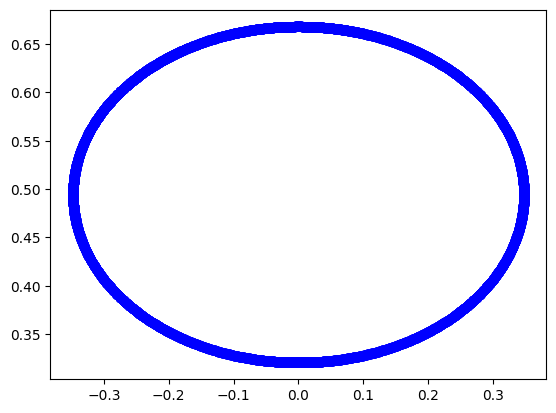

In [3]:
import matplotlib.pyplot as plt

uvs = []

for i in range(6000):
    current_time = current_time + timedelta(minutes=1)
    obs_time = Time(current_time.isoformat(), location=vla)
    obs_local_sidereal_time = obs_time.sidereal_time(kind='mean')
    hour_angle = obs_local_sidereal_time - source.ra
    print(hour_angle)
    transform_xyz_uvw = np.array([
    [np.sin(hour_angle), np.cos(hour_angle), 0],
    [-np.sin(source.dec) * np.cos(hour_angle), np.sin(source.dec) * np.sin(hour_angle), np.cos(source.dec)],
    [np.cos(hour_angle) * np.cos(source.dec), np.sin(hour_angle) * np.cos(source.dec), np.sin(source.dec)]    
])
    baseline_uvw = np.matmul(transform_xyz_uvw, baseline_xyz) / obs_wavelength
    uvs.append(baseline_uvw[:2])

uvs = np.array(uvs)

plt.scatter(uvs[:,0], uvs[:,1], color='blue')

plt.show()
